# PRODUCT DEMAND PREDICTION - ADS_PHASE_5

# TEAM NUMBER : 01

# - Sanjay Kadavarath Ajayakumar(Team Leader)


## Problem Statement :  Loading and Preprocessing 

In this part we  will begin building our project by loading and preprocessing the dataset. 

We have begin building the product demand prediction model by loading and preprocessing the dataset. 


In [28]:
#importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#importing the netflix dataset
file_path = r"C:\Users\sanja\Downloads\K2\archive\PoductDemand.csv" 
encoding = "ISO-8859-1"
df = pd.read_csv(file_path, encoding=encoding)
df

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52
...,...,...,...,...,...
150145,212638,9984,235.8375,235.8375,38
150146,212639,9984,235.8375,235.8375,30
150147,212642,9984,357.6750,483.7875,31
150148,212643,9984,141.7875,191.6625,12


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


In [30]:
df.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


In [31]:
#to display null values
df.isnull()

,ID,Store ID,Total Price,Base Price,Units Sold
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
150145,False,False,False,False,False
150146,False,False,False,False,False
150147,False,False,False,False,False
150148,False,False,False,False,False


In [32]:
#handling null values

df.fillna(df.mean(), inplace=True) 
df.dropna(inplace=True)

In [33]:
label_encoder = LabelEncoder()
df['Store ID'] = label_encoder.fit_transform(df['Store ID'])
df


,ID,Store ID,Total Price,Base Price,Units Sold
0,1,3,99.0375,111.8625,20
1,2,3,99.0375,99.0375,28
2,3,3,133.9500,133.9500,19
3,4,3,133.9500,133.9500,44
4,5,3,141.0750,141.0750,52
...,...,...,...,...,...
150145,212638,75,235.8375,235.8375,38
150146,212639,75,235.8375,235.8375,30
150147,212642,75,357.6750,483.7875,31
150148,212643,75,141.7875,191.6625,12


In [34]:
#scaling

scaler = StandardScaler()
df['Total Price'] = scaler.fit_transform(df['Total Price'].values.reshape(-1, 1))
df

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,3,-1.041443,111.8625,20
1,2,3,-1.041443,99.0375,28
2,3,3,-0.703497,133.9500,19
3,4,3,-0.703497,133.9500,44
4,5,3,-0.634528,141.0750,52
...,...,...,...,...,...
150145,212638,75,0.282754,235.8375,38
150146,212639,75,0.282754,235.8375,30
150147,212642,75,1.462118,483.7875,31
150148,212643,75,-0.627632,191.6625,12


In [35]:
#scaling

scaler = StandardScaler()
df['Base Price'] = scaler.fit_transform(df['Base Price'].values.reshape(-1, 1))
df

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,3,-1.041443,-0.969377,20
1,2,3,-1.041443,-1.084958,28
2,3,3,-0.703497,-0.770322,19
3,4,3,-0.703497,-0.770322,44
4,5,3,-0.634528,-0.706110,52
...,...,...,...,...,...
150145,212638,75,0.282754,0.147904,38
150146,212639,75,0.282754,0.147904,30
150147,212642,75,1.462118,2.382466,31
150148,212643,75,-0.627632,-0.250208,12


In [36]:
#train_test split

X = df.drop('Units Sold', axis=1)
y = df['Units Sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
print("\n X_test info")
print(X_test.info())


 X_test info
<class 'pandas.core.frame.DataFrame'>
Index: 30030 entries, 144782 to 110483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           30030 non-null  int64  
 1   Store ID     30030 non-null  int64  
 2   Total Price  30030 non-null  float64
 3   Base Price   30030 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 1.1 MB
None


In [38]:
#train_test split

#X = df.drop('Units Sold', axis=1)
#y = df['Units Sold']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#print("\n X_test info")
#print(X_test.info())

In [40]:
# Drop non-numeric columns
X = df.drop(["Store ID", "Total Price", "Base Price", "Units Sold"], axis=1)
y = df["Units Sold"]

# Import necessary libraries for model training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")



Mean Absolute Error (MAE): 35.00456348618878
Mean Squared Error (MSE): 3281.7516859029047
Root Mean Squared Error (RMSE): 57.28657509314817
R-squared (R2): -0.00019064320674355706


In [41]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Import necessary libraries for model training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [45]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 35.00456348618878
Mean Squared Error (MSE): 3281.7516859029047
Root Mean Squared Error (RMSE): 57.28657509314817
R-squared (R2): -0.00019064320674355706


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

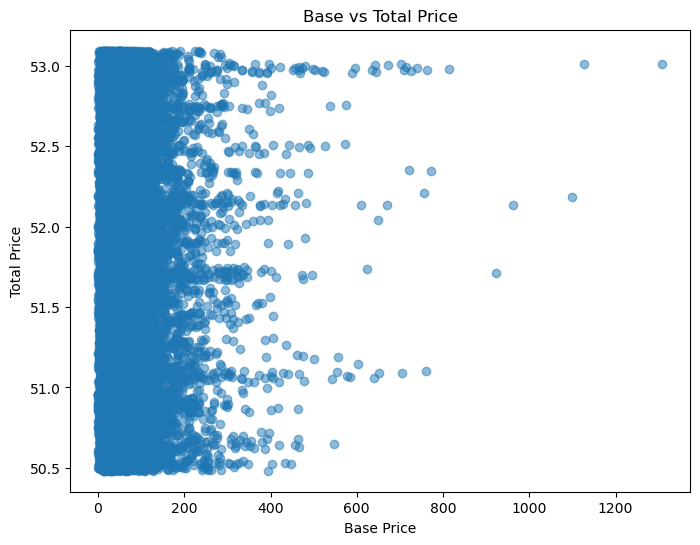

In [47]:
# Scatter plot of actual IMDb scores vs. predicted IMDb scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Base Price")
plt.ylabel("Total Price")
plt.title("Base vs Total Price")
plt.show()

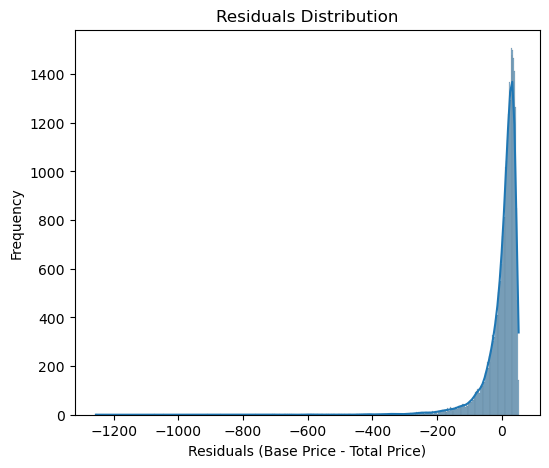

In [48]:
# Distribution plot of the residuals (predicted - actual IMDb scores)
residuals = y_pred - y_test
plt.figure(figsize=(6, 5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Base Price - Total Price)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
X = df.drop(["Store ID", "Total Price", "Base Price", "Units Sold"], axis=1)
y = df["Units Sold"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

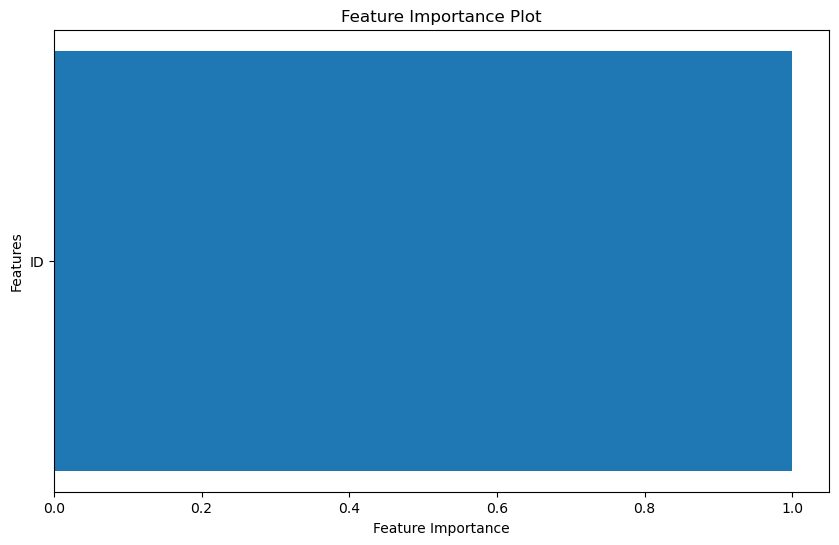

In [52]:
if isinstance(model, RandomForestRegressor):
    feature_importance = model.feature_importances_
    feature_names = X_train.columns
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importance)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance Plot")
    plt.show()

In [26]:
import pandas as pd

def predict_product_demand(ID, store_id, total_price, base_price, units_sold):
    # Assuming you have a label_encoder for transforming Store ID
    # You should replace `label_encoder` with the actual variable you're using
    store_id_encoded = label_encoder.transform([store_id])[0]

    # Create input data for prediction
    input_data = pd.DataFrame({'Base Price': [base_price], 'Store ID': [store_id], 'Total Price': [total_price], 'Units Sold': [units_sold]})

    # Make a prediction using your 'model'
    # Replace 'model' with the actual machine learning model you have trained
    predicted_product_demand = model.predict(input_data)

    return predicted_product_demand


In [ ]:
# User input
ID = input("Enter the ID: ")
store_id = input("Enter the Store ID: ")
total_price = input("Enter the Total Price: ")
base_price = float(input("Enter the Base Price: "))
units_sold = input("Enter the Units Sold: ")

predicted_score = predict_product_demand(ID, store_id, total_price, base_price, units_sold)
print(f"Predicted Product Demand : {predicted_score:.2f}")